## Bio 1B Jupyter Introduction: Darwin's Finches
_Estimated Time: 20 minutes_

Welcome! In this introduction to Jupyter Notebooks, we will learn how to compare the means of two distributions of data.  Specifically, we will compare distributions of beak sizes of Darwin's Finches, _Geospiza fortis_, for those that survived a drought and those that did not. We will use resampling approaches to estimate a p-value to test if the means of the distributions are significantly different from each other. These are the same approaches you will use in the Strawberry Creek Lab.

Jupyter Notebooks are especially useful to visualize data and to repeat easily manipulations of data.

To access your Notebooks, go to https://datahub.berkeley.edu and log-in through bCourses.

You will need to upload this file and another file of your data.  Click the upload button in the upper right of the screen and find your file.  Then click upload again.  This file is called 
_Bio 1B Jupyter Introduction Darwin's Finches.ipynb_.  The data file is _Finches.csv_.
The data needs to be in .csv, or comma-delimited format.  To do this, open your data file in Excel or Google Sheets, delete any rows with missing data (for convenience) and save the file as a .csv file.


<p><a href="https://www.bravoyourcity.com/story/cal-secret-spots-strawberry-creek"><img src=\"images/Bridge.png\"></a></p>

**Learning Outcomes**

By the end of the notebook, students should be able to:

1. Open and run a Jupyter Notebook on Berkeley's jupyterhub.
2. Understand how to compare the central tendency (mean) of two distributions.
3. Be able to describe how to estimate p-values through resampling.

## Table of Contents 

1. [Jupyter Notebooks](#1)
    - [Types of Cells](#1.1)
    - [Running Cells](#1.2)
    - [Editting, Saving and Submitting](#1.3)
<br/><br/>
2. [Data Recording](#2)
<br/><br/>
3. [Introduction to Data Analytics](#3)
    - [Null and Alternate Hypothesis](#3.1)
    - [Permutation Test](#3.2)
<br/><br/> 

## Jupyter Notebooks <a id='1'></a>

This exercise is currently set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, comprising different types of __cells__. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.
 
### Types of cells <a id= '1.1'> </a>

There are two types of cells in Jupyter, __code__ cells and __markdown__ cells. Code cells are cells indicated with “In [  ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell.
Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.

### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:
- press __Shift + Enter__
- click __Cell -> Run Cells__ in the toolbar at the top of the screen.

You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens. 

In [3]:
print("Hello, World")

Hello, World


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Submitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- In the lab, we will go over the specifics of how to __submit__ your results as part of your lab report.

## Introduction

Here, we will use Python, one of the programming languages Jupyter supports, to analyze survival data of Darwin's Finches, _Giospiza fortis_, in the Galapagos following a drought. Python is a general-purpose programming language that allows us to analyze and manipulates large amounts of data. The main purpose of this exercise is to determine whether or not the beak depths differ significantly between birds that survived a drought and those that did not. 

You will need to run this next cell to import tools needed by Python for manipulating data frames and for plotting.

In [4]:
import numpy as np
import pandas as pd
import qgrid
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

## Data Recording <a id='2'> </a>

In this section you will be importing the data from an excel sheet.  In the lab, you will be importing the data from your lab section!

To import your data from excel or a google sheet you must save the file as a ".csv" file.  To do this:
1. Open up the desired excel or google sheets form.
2. Navigate to the __File__ tab and hover over __Download__ or __Save As__.
3. From there another drop down tab should appear with differect formats in which to download the form. Select the __Comma-Separated Values (csv)__ option.

To import the data set just run the following cell!  Then, you will see the first few rows of the data frame.

In [5]:
#if you don't want a line of code to run, put a # before the line, like this one
#data = pd.read_csv("data set name")
data = pd.read_csv("Finches.csv")
data.head()

,Bird,Survived,Beak_depth
0,9,No,8.3
1,12,No,7.5
2,276,No,8.0
3,278,No,10.6
4,283,No,11.2


__QGrid__

We will be using a Python widget called QGrid to inspect and manupulate the data. QGrid allows you to easily filter through the different columns of data in your data set. To implement Qgrid on your data set run the following cell!  You will see that each bird has an individual number as well as information on whether it survived (yes or no) and its beak depth. Try clicking on the column headings to sort the data by that column.

In [6]:
qgrid.show_grid(data)
#data.describe()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

To the right of each column title there is a little filter icon that displays a drop down bar when you click on it. This view lets you decice which items or numbers you would like to include in your analysis. 

## Introduction to Data Analytics <a id= '3'> </a>

### Null Hypothesis vs. Alternate Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance. In this exercise we are trying to determine whether or not the difference between beak sizes (here measured as beak depth) of birds that survive a drought or not is significant. To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two distributions and that any difference is due to experimental error, or measurement error, or chance.

__Alternative Hypothesis__: An alternative hypothesis essentially counters the null hypothesis and claims that the difference in distribution is meaningful, or significant, for some reason.


Rosemary Grant and Peter Grant have been studying finches in the Galapagos Islands for many years.  In 1977, there was a major drought and because of seed scarcity approzimately 1/2 of a poplulation of the medium ground finch, _Giospiza fortis_, did not survive.  Because they had measured many morphological characters of finches before the drought, they could compare those characteristics of those that survived and those that did not. In this dataset are measurements of 50 finches that survived the drought and 50 finches that did not.

Beak depth is a measure of beak size and provides an indication of how large a seed a bird crunch and then eat-- birds with larger beak depths can eat larger seeds, and they can also eat small seeds.  

For this data set, what would the potential hypotheses be? 

__Example Null Hypothesis__
- The drought affected all birds equally, and only chance determined which survived the drought and which did not.  If true, we predict that the distribution of the beak depths is the same for birds that survived the drought and those that did not. Thus, any differences in the two sample distributions is due to chance or measurement error.

__Example Alternative Hypothesis__  
- Birds that could eat a wider range of sizes of seeds, were more likely to survive, because they had access to a wider range of sizes of seeds, and especially the larger ones.  If this is true, we predict that the beak sizes of those birds that survived will be larger than those of birds that did not.

How would we test this? What would be our prediction for each hypothesis?  First, let's look at the data for measurements of beak depth for the entire population before the drought.

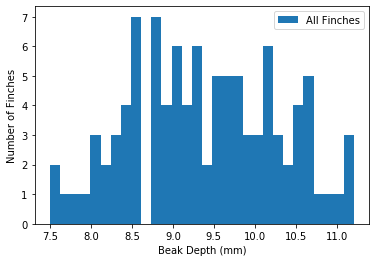

In [8]:
plt.hist(data['Beak_depth'], bins=30, label="All Finches")
plt.xlabel('Beak Depth (mm)')
plt.ylabel('Number of Finches')
plt.legend();

Next, of these, let's look at separate distributions for those finches that survived the drought (gold) and those that did not (blue).  The means for each distribution are shown with vertical lines.

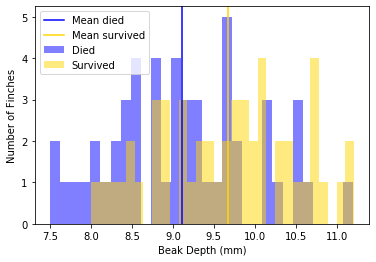

In [18]:
dataNo = data[:50]
dataYes = data[50:]

plt.hist(dataNo['Beak_depth'] , color='blue', alpha=0.5, bins=30, label='Died')
plt.hist(dataYes['Beak_depth'], color='gold', alpha=0.5, bins=30, label='Survived')

plt.axvline(dataNo['Beak_depth'].mean(), color='blue', label='Mean died')
plt.axvline(dataYes['Beak_depth'].mean(), color='gold', label='Mean survived')

plt.xlabel('Beak Depth (mm)')
plt.ylabel('Number of Finches')
plt.legend();

What are your null and alternative hypotheses? What prediction about the means of the distribuion can you make?

First, let's calculate the observed difference in the means of the two distributions, denoted by the two lines in the figure above. We call this our observed difference because it is observed from data that is actually collected.

In [19]:
observed_difference = data[data['Survived']=='Yes'].mean() - data[data['Survived']=='No'].mean()
print("Observed difference between the means of the original two distributions = ")
observed_difference['Beak_depth']

Observed difference between the means of the original two distributions = 


0.5627999999999993

After you have your null and alternative hypothesis, and your observed difference, the next step is to simulate the distribution under the null hypothesis and test your prediction! Theoretically, if the differences in distributions were solely due to random chance, then the data that each distribution originally comes from would be the same. This is where permutation tests come in to play.

### Permutation Test <a id='3.2'> </a>

A permutation test essentially shuffles the given data set and creates new distributions. In this case, we are using a permutation test to shuffle finches randomly between categories of those that survived and those that did not. We end up with the same size data set and with the the same number of observations in each category as we had when we started, but the data have been shuffled between categories. We then calculate the mean for each of the two new distributions and compare those means. 

Run the cell below to generate a permutation of the data and to calculate the difference between in means for each of the two new distributions.  

You can run this cell below again several times and you will see that each permutation will give a slightly different set of distributions and slightly different means. Why?

Difference between the means of the two distributions after one permutation = 


Beak_depth   -0.3384
dtype: float64

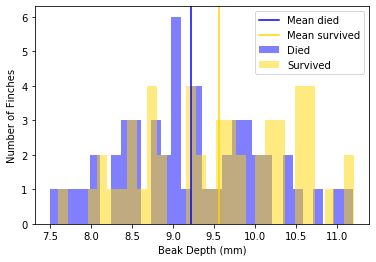

In [23]:
perm_example = pd.DataFrame({
    'Beak_depth':data['Beak_depth'].sample(len(data['Beak_depth'])),
    'Survived':np.append(np.repeat('No', 50), np.repeat('Yes', 50))
})
#perm_example

dataNo = perm_example[:50]
dataYes = perm_example[50:]

plt.hist(dataNo['Beak_depth'] , color='blue', alpha=0.5, bins=30, label='Died')
plt.hist(dataYes['Beak_depth'], color='gold', alpha=0.5, bins=30, label='Survived')
plt.axvline(dataNo['Beak_depth'].mean(), color='blue', label='Mean died')
plt.axvline(dataYes['Beak_depth'].mean(), color='gold', label='Mean survived')
plt.xlabel('Beak Depth (mm)')
plt.ylabel('Number of Finches')
plt.legend();

perm_difference = perm_example[perm_example['Survived']=='No'].mean() - perm_example[perm_example['Survived']=='Yes'].mean()
print("Difference between the means of the two distributions after one permutation = ")
perm_difference

What you see above is just for one permutation of the data. Look to see where the means are.  How different are they?

Now we perform the permutation test many many more times (here, 5,000), and with these values we can plot the distribution of all those differences. We can look back at our actual observed difference between the two distributions and compare that with this distribution of simulated differences.  We can than ask how likely it is to observe the actual difference we did if our null hypotheis is true. This next cell runs the permutations and plots the results. It may take a little time to run...

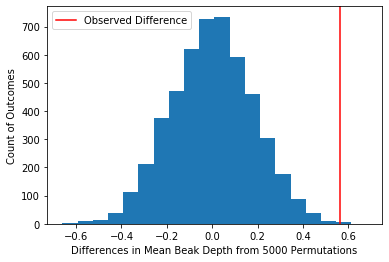

In [29]:
def difference_in_means(BD_scores):
    return np.mean(BD_scores[:50]) - np.mean(BD_scores[50:])

n_repeats = 5000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['Beak_depth'].sample(len(data['Beak_depth']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)
    
#permutation_differences

plt.hist(permutation_differences, bins=20)
plt.axvline(observed_difference["Beak_depth"], color='red', label='Observed Difference')
plt.xlabel('Differences in Mean Beak Depth from 5000 Permutations')
plt.ylabel('Count of Outcomes')
plt.legend();

The red line is the observed difference from the original data (see above) and the histogram shows the differences in means from the 5,000 repeats of permuted data. This may take a few seconds to finish.

Using this plot, we can guess whether the null hypothesis is true (the observed difference between beak depth of finches that survived or did not survive is due to random chance) or if the alternative hypothesis is true (that finches that survived had larger beak depths, and a difference between the two distributions is not due to chance alone).

__Discussion Question__

**Based on the graph, how likely is it for the observed difference to occur, and can we reject the null hypothesis?**

_Type your answer here_

Answer: Based on the distribution, getting the observed difference by random chance or measurement error is very unlikely, because the observed difference is far out in the tail of the distribution. Thus, our original observation is considered very unlikely to have occurred by chance alone.

We can calculate how unlikely our observation is, by calculating how many permutaions are as extreme, or more extreme, than what we observed.  Typically, we use p < 0.05 (or 5%) as a cut-off value, or p-value, for what is "statistically significant". In this case, does our observation fall in the most extreme 5% of the permutatation results?

In [ ]:
p_val_count = sum(i >= observed_difference["Beak_depth"] for i in permutation_differences)/len(permutation_differences)
print("p-value = ")
p_val_count

We will use this same approach in the Strawberry Creek Lab next week to test whether there are differneces in environmental health between two forks of the creek.  Instead of beak data, we will be comparing counts of aquatic organisms and related measures.
In the lab next week, as you did for this Jupyter Notebook, you will upload into https://datahub.berkeley.edu the files for the Strawberry Creek Jypyter Notebook as well as data you collect in lab, as a .csv file.  These files are found in the Bio1B Resources folder on bCourses.

## Bibliography 

---

Notebook developed by: Joshua Asuncion, Karalyn Chong, Andy Sheu, George Roderick

Data Science Modules: http://data.berkeley.edu/education/modules

Bird Beak Data: https://www.biointeractive.org/classroom-resources/evolution-action-data-analysis

Berkeley's Data8 on Hypothesis Testing: https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html 

Galapagos medium ground finch, _Geospiza fortis_: https://en.wikipedia.org/wiki/Medium_ground_finch